In [1]:
import sys
sys.path.append('..')
import pymbd
from pymbd import mbd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bohr = mbd.bohr

In [3]:
mbd.init_grid(50)

In [4]:
np.set_printoptions(suppress=True, linewidth=120)

## Argon dimer

In [5]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (4., 0., 0.)]/bohr

In [6]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [7]:
mbd.get_single_mbd_energy('', 'fermi,dip', xyz, alpha_0, omega, r_vdw=R_vdw, beta=1., a=6.)[0]

-0.00012237370437961914

In [8]:
mbd.get_single_rpa_energy('', 'fermi,dip', xyz, mbd.alpha_dynamic_ts_all('C', mbd.n_grid_omega, alpha_0, c6=C6),
                       r_vdw=R_vdw, beta=1., a=6.)[0]

-0.00012237370433254997

In [9]:
mbd.get_ts_energy('', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6.)

-0.00012234680219387335

## Linear argon chain

In [10]:
species = ['Ar']
xyz = [(0., 0., 0.)]/bohr
uc = np.array([(4., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [11]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [12]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [13]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'dip,gg', xyz, alpha_0, omega, k_grid, uc,   
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

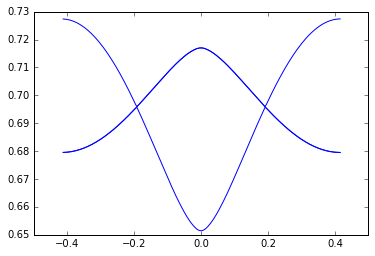

In [14]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [15]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [16]:
ns_cell = [4, 8, 12, 20, 40, 80]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy('C', 'fermi,dip', xyz, alpha_0, omega, uc, (n_cell, 1, 1),
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

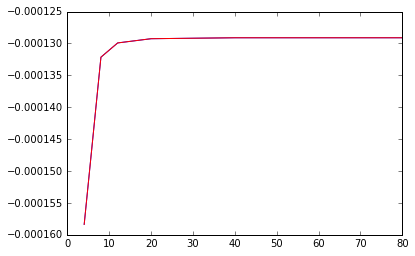

In [17]:
plt.plot(ns_cell, enes_supercell, 'b',
         ns_kpt, enes_periodic, 'r')

In [18]:
mbd.get_ts_energy('C', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.00012831280408036967

In [19]:
(enes_supercell[-1], enes_periodic[-1])

(-0.00012910197577742366, -0.00012910197602867545)

In [20]:
mbd.get_supercell_mbd_energy('C', 'fermi,dip', xyz, alpha_0, omega, uc, (80, 1, 1),
                             r_vdw=R_vdw, beta=1., a=6.)[0]

-0.00012910197577742366

In [21]:
mbd.get_supercell_mbd_energy('CQ', 'fermi,dip', xyz, alpha_0, omega, uc, (80, 1, 1),
                             r_vdw=R_vdw, beta=1., a=6.)[0]

-0.0001291019749862587

In [22]:
mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                             r_vdw=R_vdw, beta=1., a=6.)[0]

-0.00012910197602867545

In [23]:
# orders = mbd.get_reciprocal_mbd_energy('RQO', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
#                              r_vdw=R_vdw, beta=1., a=6.)[3]

In [24]:
# plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], orders[:, i]))), 'b-') for i in range(omegas.shape[1])))

## Linear argon chain (2 atoms in cell)

In [25]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (4., 0., 0.)]/bohr
uc = np.array([(8., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [26]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [27]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [28]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

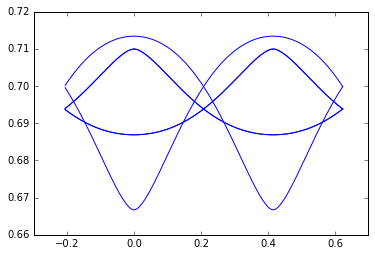

In [29]:
plt.plot(*chain.from_iterable((
            *zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))),
            'b-',
            *zip(*sorted(zip(k_grid[:, 0]+2*np.pi/8*bohr, omegas[:, i]))),
            'b-'
        ) for i in range(omegas.shape[1])))

In [30]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [31]:
ns_cell = [4, 8, 12, 20, 40, 80]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy('C', 'fermi,dip', xyz, alpha_0, omega, uc, (n_cell, 1, 1),
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

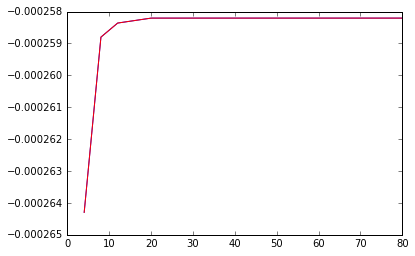

In [32]:
plt.plot(ns_cell, enes_supercell, 'b',
         ns_kpt, enes_periodic, 'r')

In [33]:
mbd.get_ts_energy('C', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)/2

-0.00012831280408036967

In [34]:
(enes_supercell[-1]/2, enes_periodic[-1]/2)

(-0.00012910197563549276, -0.0001291019760286727)

## Two parallel argon chains

In [35]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (0., 0., 4.)]/bohr
uc = np.array([(4., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [36]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [37]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [38]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

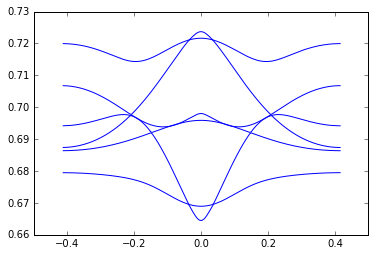

In [39]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [40]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [41]:
ns_cell = [4, 8, 12, 20, 40, 80]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy('C', 'fermi,dip', xyz, alpha_0, omega, uc, (n_cell, 1, 1),
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

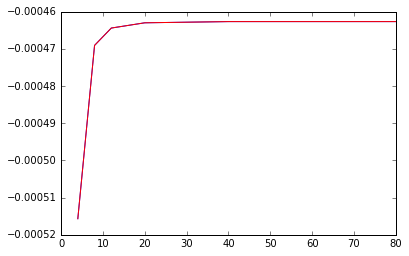

In [42]:
plt.plot(ns_cell, enes_supercell, 'b',
         ns_kpt, enes_periodic, 'r')

In [43]:
mbd.get_ts_energy('C', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.0004638232304148753

In [44]:
(enes_supercell[-1], enes_periodic[-1])

(-0.0004626876697461313, -0.00046268767025250956)

## Argon crystal

In [45]:
species = ['Ar']
xyz = [(0., 0., 0.)]/bohr
uc = np.array([(4., 0., 0.), (0., 4., 0.), (0., 0., 4.)])/bohr
mbd.param_vacuum_axis = (False, False, False)

In [46]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [47]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(100, 1, 1), uc)

In [48]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

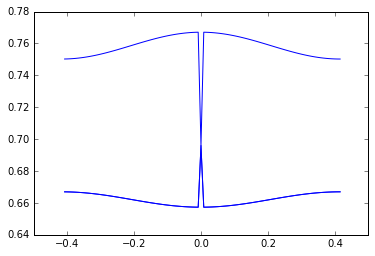

In [49]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [50]:
ns_kpt = [3, 4, 5, 6, 7, 8]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, n_kpt, n_kpt), uc)+0.01
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [51]:
ns_cell = [3, 4, 5, 6, 7]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy('C', 'fermi,dip', xyz, alpha_0, omega, uc, (n_cell, n_cell, n_cell),
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

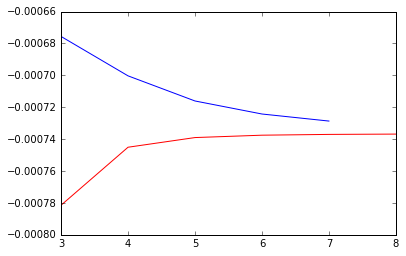

In [52]:
plt.plot(ns_cell, enes_supercell, 'b',
         ns_kpt, enes_periodic, 'r')

In [53]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(5, 5, 5), uc)+0.01

In [54]:
mbd.get_ts_energy('C', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.0007571292369630357

## Graphene

In [55]:
species = ['C', 'C']
xyz = [(0., 0., 0.), (2.46000413, 1.42034734, 0.)]/bohr
uc = np.array([
    (2.45999892, 0.00000000, 0.00000000),
    (1.22999946, 2.13042155, 0.00000000),
    (0.00000000, 0.00000000, 100.00000000)])/bohr
mbd.param_vacuum_axis = (False, False, True)

In [56]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [57]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [58]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

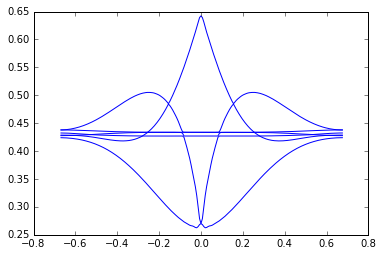

In [59]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [60]:
ns_kpt = [4, 6, 8, 10, 15, 20, 30]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, n_kpt, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [61]:
ns_cell = [5, 7, 9, 11, 13, 17]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy('C', 'fermi,dip', xyz, alpha_0, omega, uc, (n_cell, n_cell, 1),
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

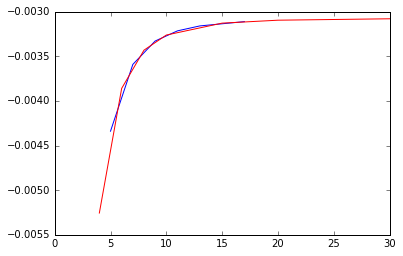

In [62]:
plt.plot(ns_cell, enes_supercell, 'b',
         ns_kpt, enes_periodic, 'r')

In [63]:
mbd.param_dipole_low_dim_cutoff = 100

In [64]:
# k_grid = mbd.make_k_grid(mbd.make_g_grid(15, 15, 1), uc)
# ene, _, _, orders = mbd.get_reciprocal_mbd_energy('RQO', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
#                                       r_vdw=R_vdw, beta=1., a=6.)

In [65]:
# k_grid = mbd.make_k_grid(mbd.make_g_grid(100, 1, 1), uc)
# orders = mbd.get_reciprocal_mbd_energy('RQO', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
#                                       r_vdw=R_vdw, beta=1., a=6.)[3]

In [66]:
# plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], orders[:, i]))), 'b-') for i in range(omegas.shape[1])))